<a href="https://colab.research.google.com/github/Rushinalawade/Credit-Card-Fraud-Detection-Model/blob/main/Credit_Card_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic** : Classification

**Member** : Rushikesh Nalawade

<h2> Project Summary <h2>

Credit card frauds are easy and friendly targets. E-commerce and many other online sites have increased the online payment modes, increasing the risk for online frauds. Increase in fraud rates, researchers started using different machine learning methods to detect and analyse frauds in online transactions.

So this project focuses on building a machine learning model which will help business take decision on which customer will default.

<H2> Problem Statement <H2>

Here the task is to predict if the customer will have default on credt card bills by analysing various independent parameters. Here we are going to use a classification model.

In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold

In [ ]:
#Dataset loading:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/default of credit card clients.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#shape of dataset:
df.shape

(30000, 25)

In [ ]:
# dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#dataset describe()
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# dataset null values.
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

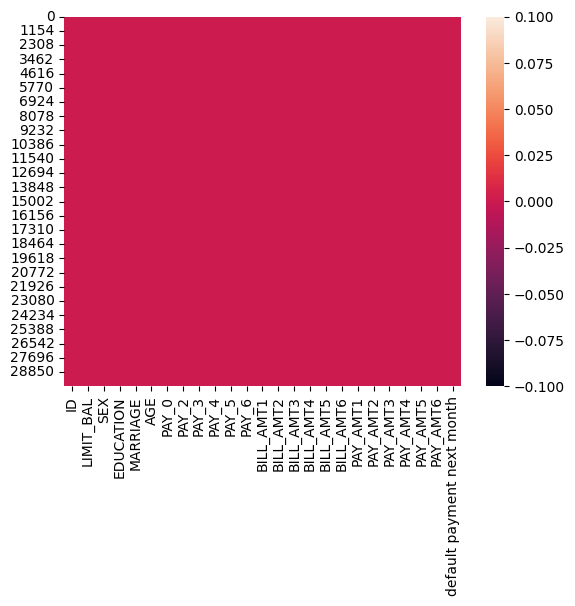

In [ ]:
# visualizing the null values.
sns.heatmap(df.isnull())

In [ ]:
#Duplicate Values:
df.duplicated().sum()

0

In [ ]:
# Droping the Null Values.
df.dropna(inplace=True)
df.shape

(30000, 25)

In [ ]:
# Unique Values in dataset:
colm = df.columns
for col in colm:
  value = df[col].nunique()
  print(f'{col} contain {value} unique values')

ID contain 30000 unique values
LIMIT_BAL contain 81 unique values
SEX contain 2 unique values
EDUCATION contain 7 unique values
MARRIAGE contain 4 unique values
AGE contain 56 unique values
PAY_0 contain 11 unique values
PAY_2 contain 11 unique values
PAY_3 contain 11 unique values
PAY_4 contain 11 unique values
PAY_5 contain 10 unique values
PAY_6 contain 10 unique values
BILL_AMT1 contain 22723 unique values
BILL_AMT2 contain 22346 unique values
BILL_AMT3 contain 22026 unique values
BILL_AMT4 contain 21548 unique values
BILL_AMT5 contain 21010 unique values
BILL_AMT6 contain 20604 unique values
PAY_AMT1 contain 7943 unique values
PAY_AMT2 contain 7899 unique values
PAY_AMT3 contain 7518 unique values
PAY_AMT4 contain 6937 unique values
PAY_AMT5 contain 6897 unique values
PAY_AMT6 contain 6939 unique values
default payment next month contain 2 unique values


<h3> Lets prepare Dataset for Analysis <h3>

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# lets see the target variable.
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

<h1> Lets do some visualization <h1>

<Axes: xlabel='AGE', ylabel='count'>

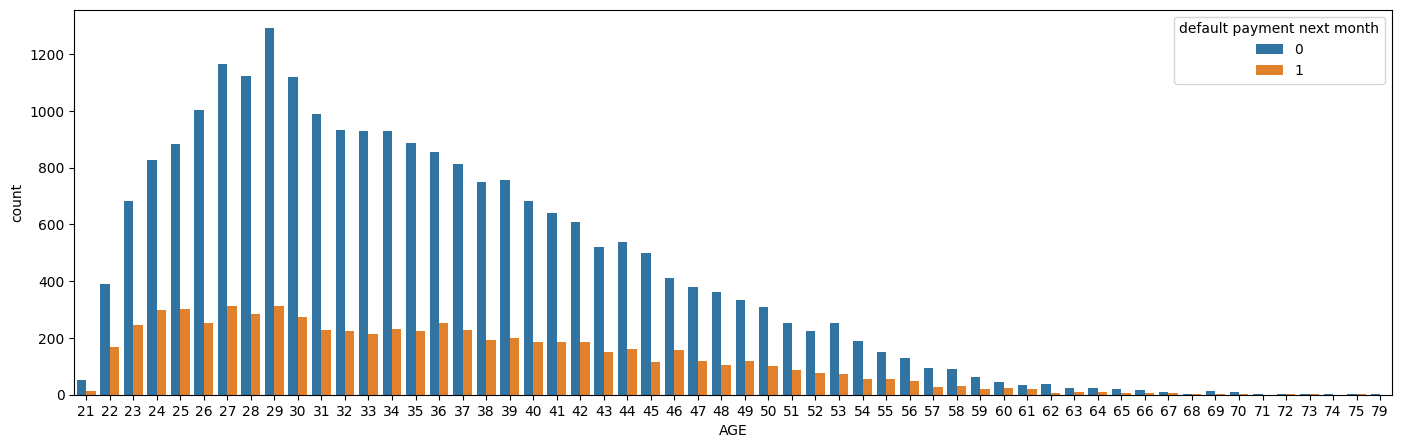

In [ ]:
# countplot for age and TenyearCHD:
plt.figure(figsize=(17,5))
sns.countplot(data=df,x='AGE',hue='default payment next month')

From the plot we can find that data is very imbalance(0 values are large in number than 1), Here we can see that most credit card user are in age 22 to 40 years and where also most fraud happens.

<Axes: xlabel='SEX', ylabel='count'>

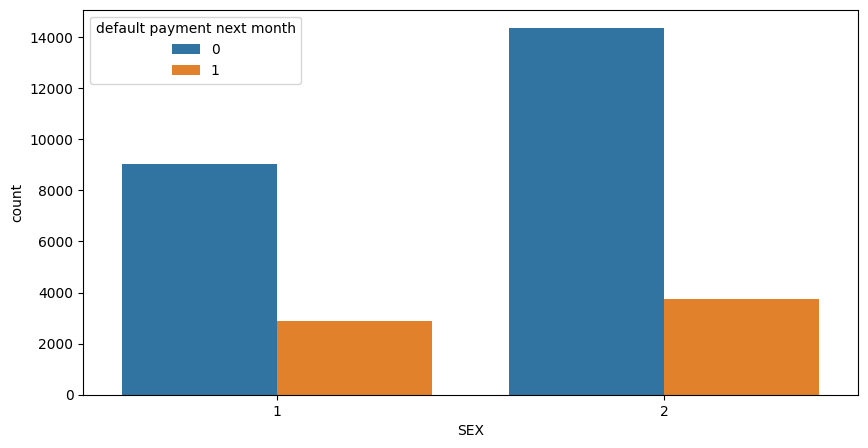

In [ ]:
# Lets compare genders:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='SEX',hue='default payment next month')

Here 1 represent Females and 2 represent Males. We find that male defaultor are slightly more than female, but if we compare the ratio there are approx 25% male defaultor and 33% female defaultors.

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

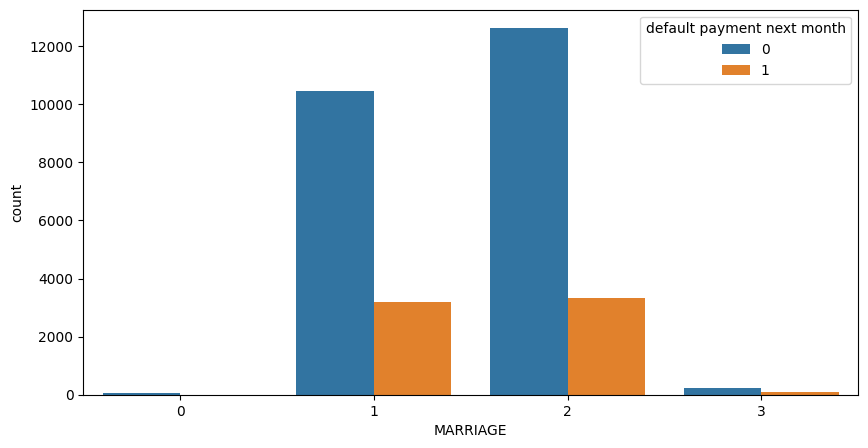

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='MARRIAGE',hue='default payment next month')

0 widow, 1 married, 2 single, 3 divorced


Single martial status customer are more followed by married one, but defaultors count is approx same in both cases.

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

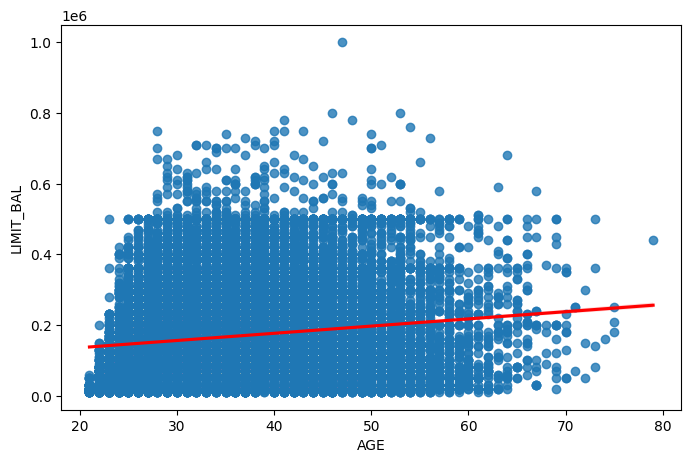

In [ ]:
#lets see relationship between Age and Limit Balance.
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='AGE',y='LIMIT_BAL',line_kws={"color": "red"})

Here we can see a positive relation between age and Balance limit, with increase in age and Balance limit also increase.

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

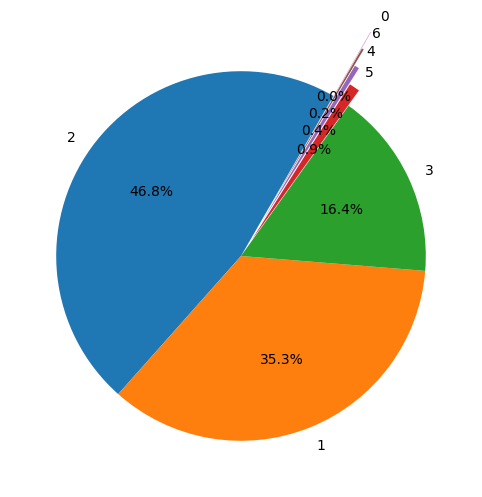

In [ ]:
#Lets look upon the education:
plt.figure(figsize=(8, 6))
plt.pie(df['EDUCATION'].value_counts(),labels=df['EDUCATION'].unique(),startangle=60,explode=[0,0,0,0.1,0.2,0.3,0.4],autopct='%1.1f%%')
plt.show()

If we consider Ordinal data most of the customer in our survey belongs to class 2 Education i.e. 46.8%

<Axes: >

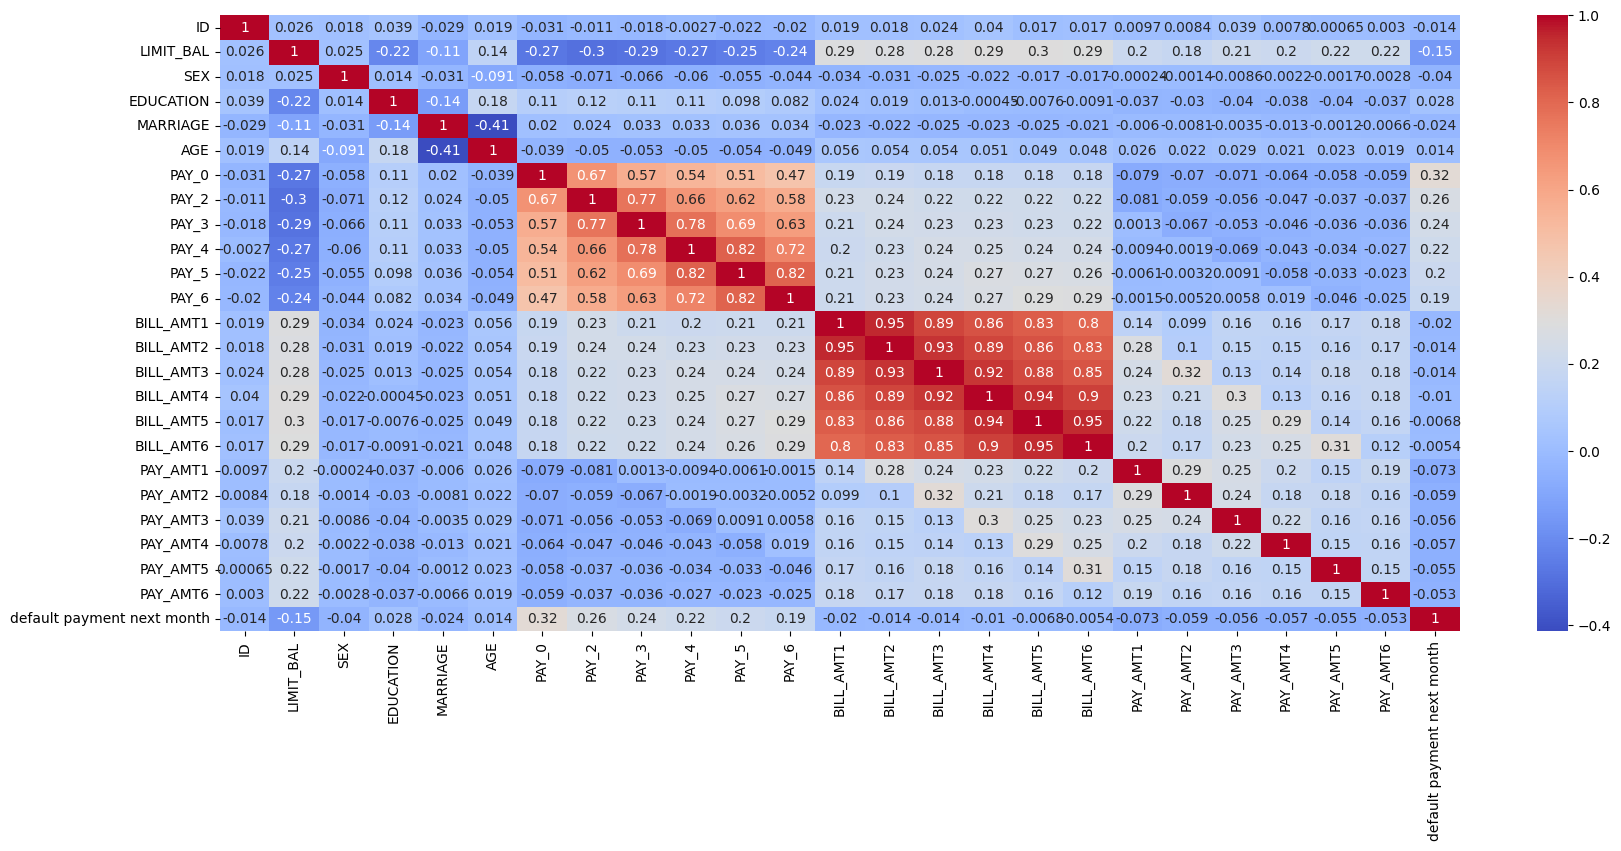

In [ ]:
# lets see correlation between the variables:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<h1> Feature Selection

In [ ]:
numrical_features = df.drop(columns={'ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month'})

In [ ]:
numrical_features

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
categorical_features = df.drop(list(numrical_features.columns),axis=1)
categorical_features.drop('default payment next month',axis=1,inplace=True)

In [ ]:
categorical_features

,ID,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,2,-1,2,0,0,0,2
2,3,2,2,2,0,0,0,0,0,0
3,4,2,2,1,0,0,0,0,0,0
4,5,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,3,1,0,0,0,0,0,0
29996,29997,1,3,2,-1,-1,-1,-1,0,0
29997,29998,1,2,2,4,3,2,-1,0,0
29998,29999,1,3,1,1,-1,0,0,0,-1


In [ ]:
y = df['default payment next month']

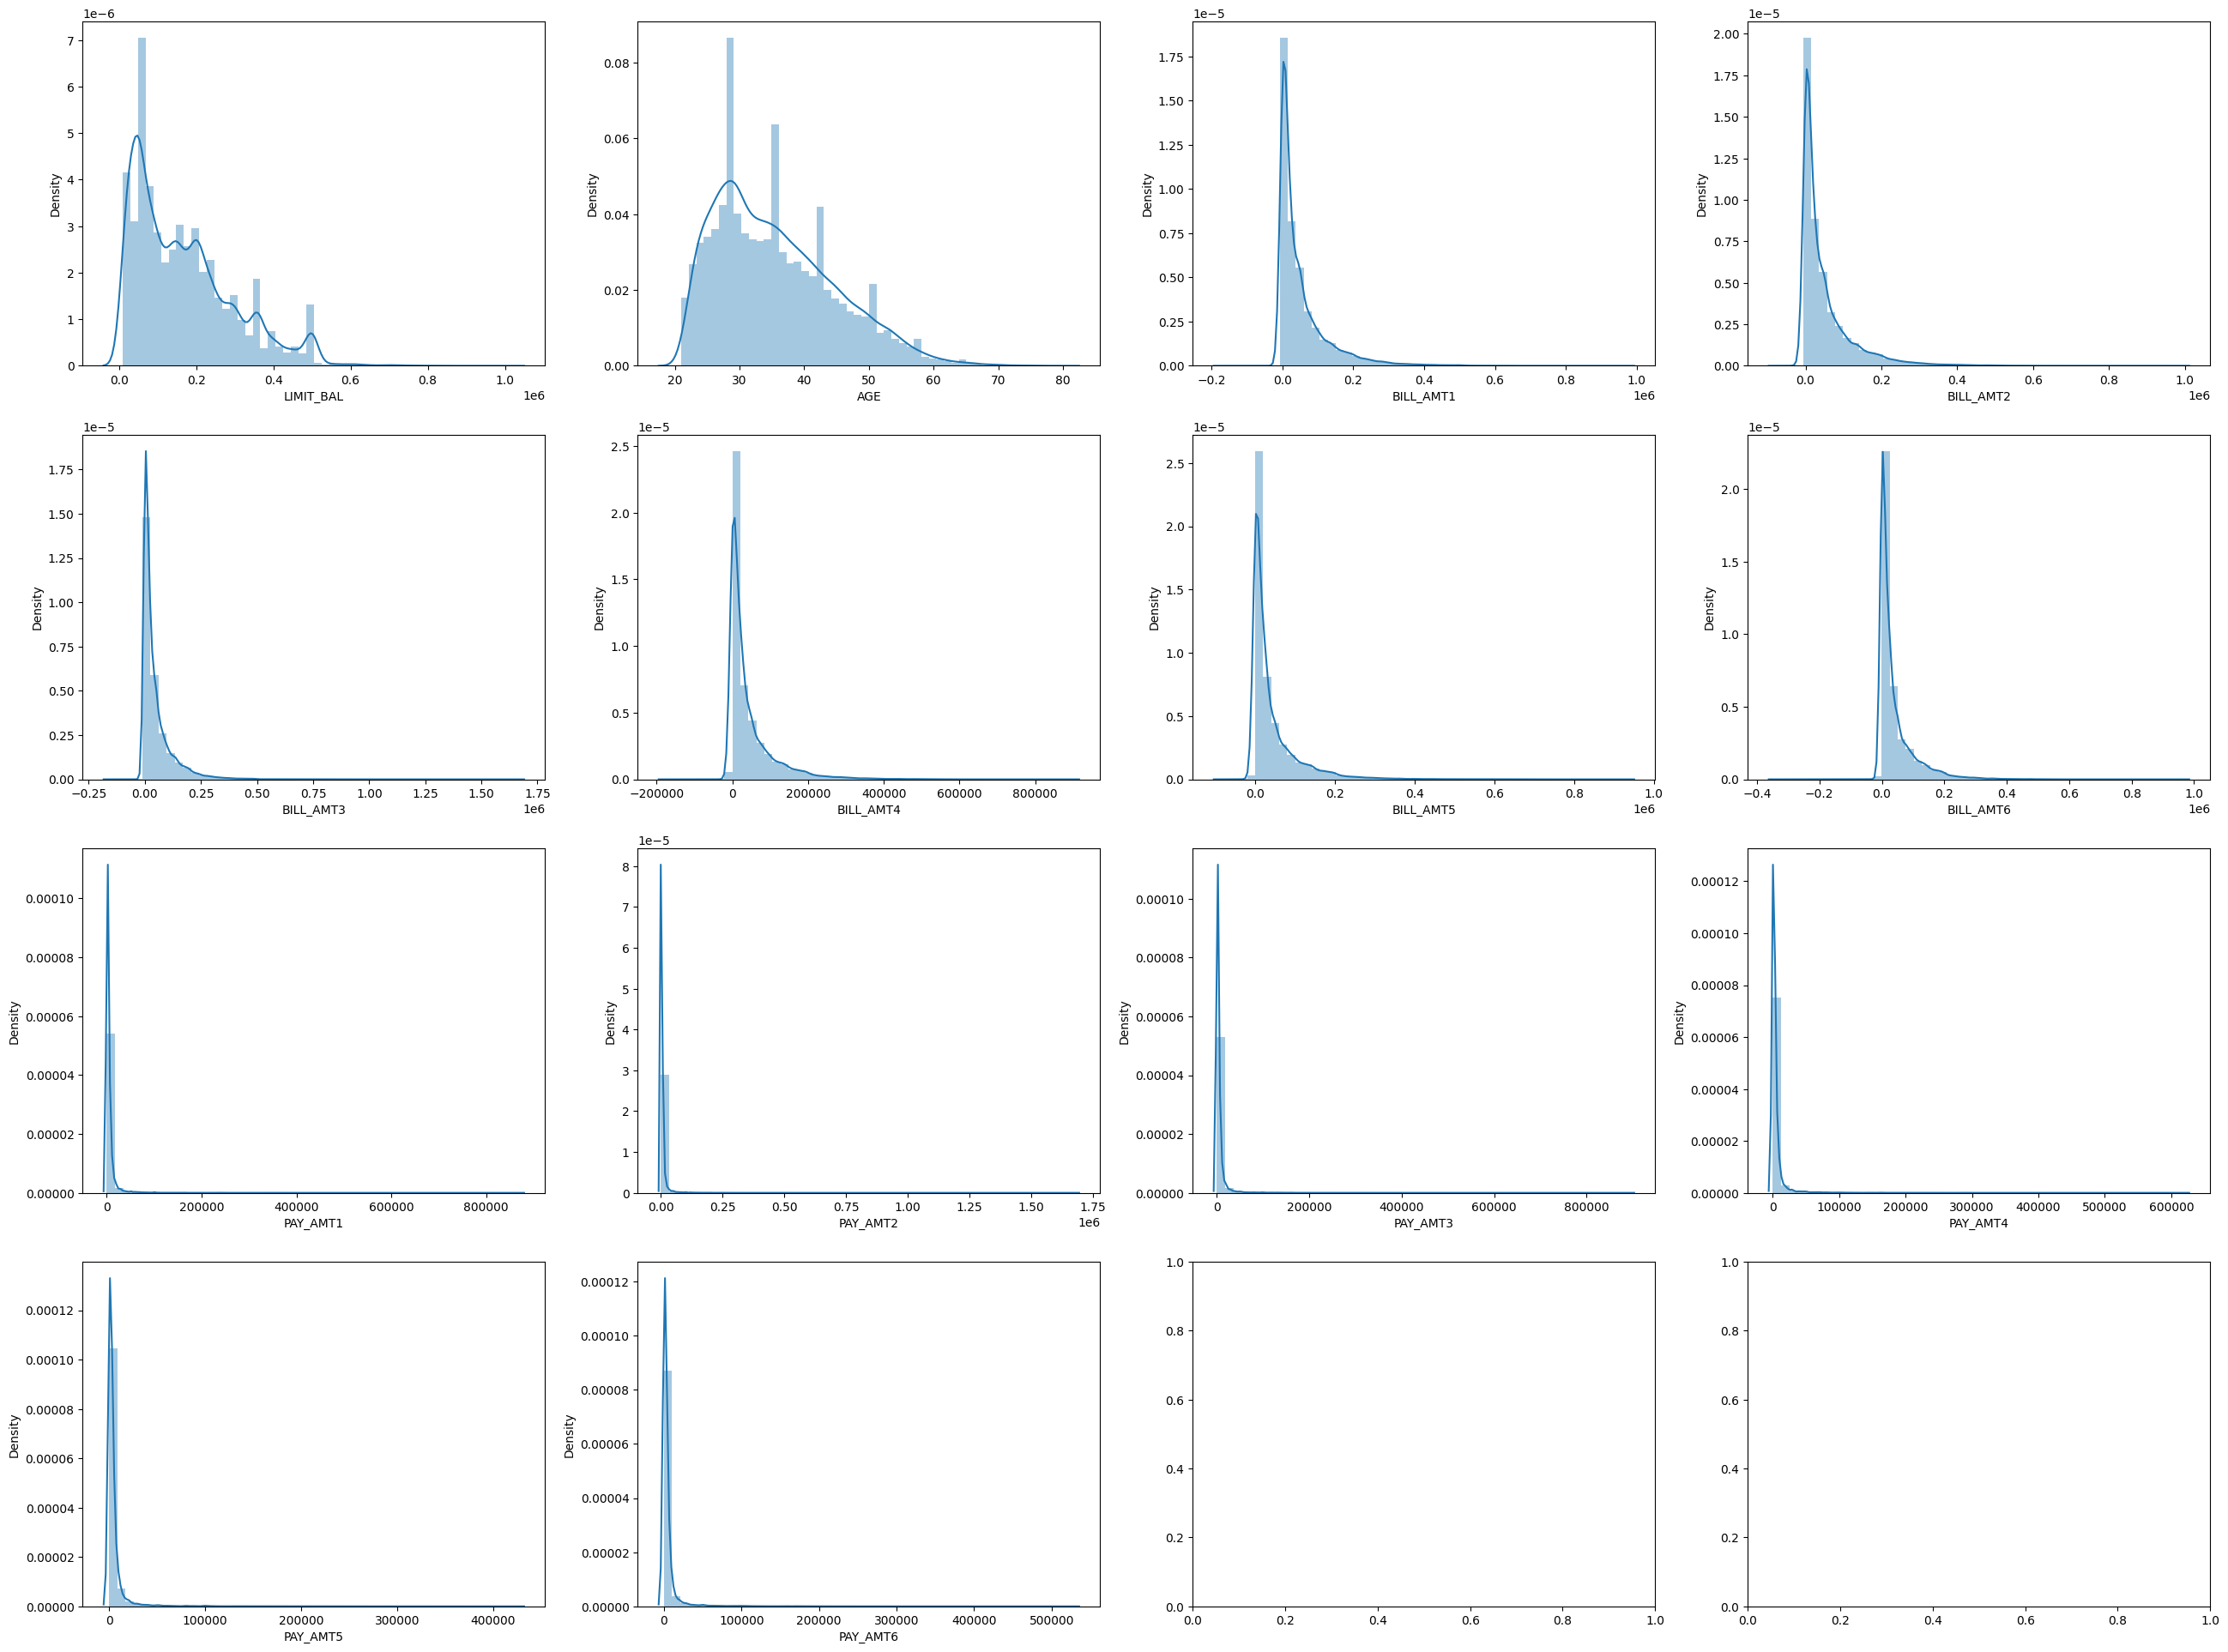

In [ ]:
fig,axs = plt.subplots(4,4,figsize=(32,24))
axs = axs.ravel()
i = 0
for col in numrical_features.columns:
  sns.distplot(numrical_features[col],ax=axs[i])
  i=i+1

In [ ]:
trans_num_features = pd.DataFrame()
for col in numrical_features.columns:
  trans_num_features[col] = np.cbrt(numrical_features[col])

In [ ]:
trans_num_features

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27.144176,2.884499,15.758079,14.584132,8.832285,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000
1,49.324241,2.962496,13.893754,11.993052,13.893754,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210
2,44.814047,3.239612,30.807338,24.116906,23.845653,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759
3,36.840315,3.332222,36.085701,36.401121,36.665353,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000
4,36.840315,3.848501,20.501487,17.831766,32.968749,27.562941,26.752191,26.745203,12.599210,33.226178,21.544347,20.800838,8.832285,8.789347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,60.368107,3.391211,57.382672,57.771495,59.284559,44.480276,31.493658,25.187917,20.408276,27.144176,17.103179,14.497423,17.099759,10.000000
29996,53.132928,3.503398,11.894916,12.227154,15.185836,20.784647,17.313669,0.000000,12.247188,15.220448,20.799297,5.052774,0.000000,0.000000
29997,31.072325,3.332222,15.276359,14.971799,14.023769,27.535711,27.404961,26.850107,0.000000,0.000000,28.020393,16.134286,12.599210,14.580997
29998,43.088694,3.448217,-11.804709,42.795677,42.414638,37.509390,22.801698,36.579112,44.122934,15.050202,10.561244,12.441863,37.554351,12.173408


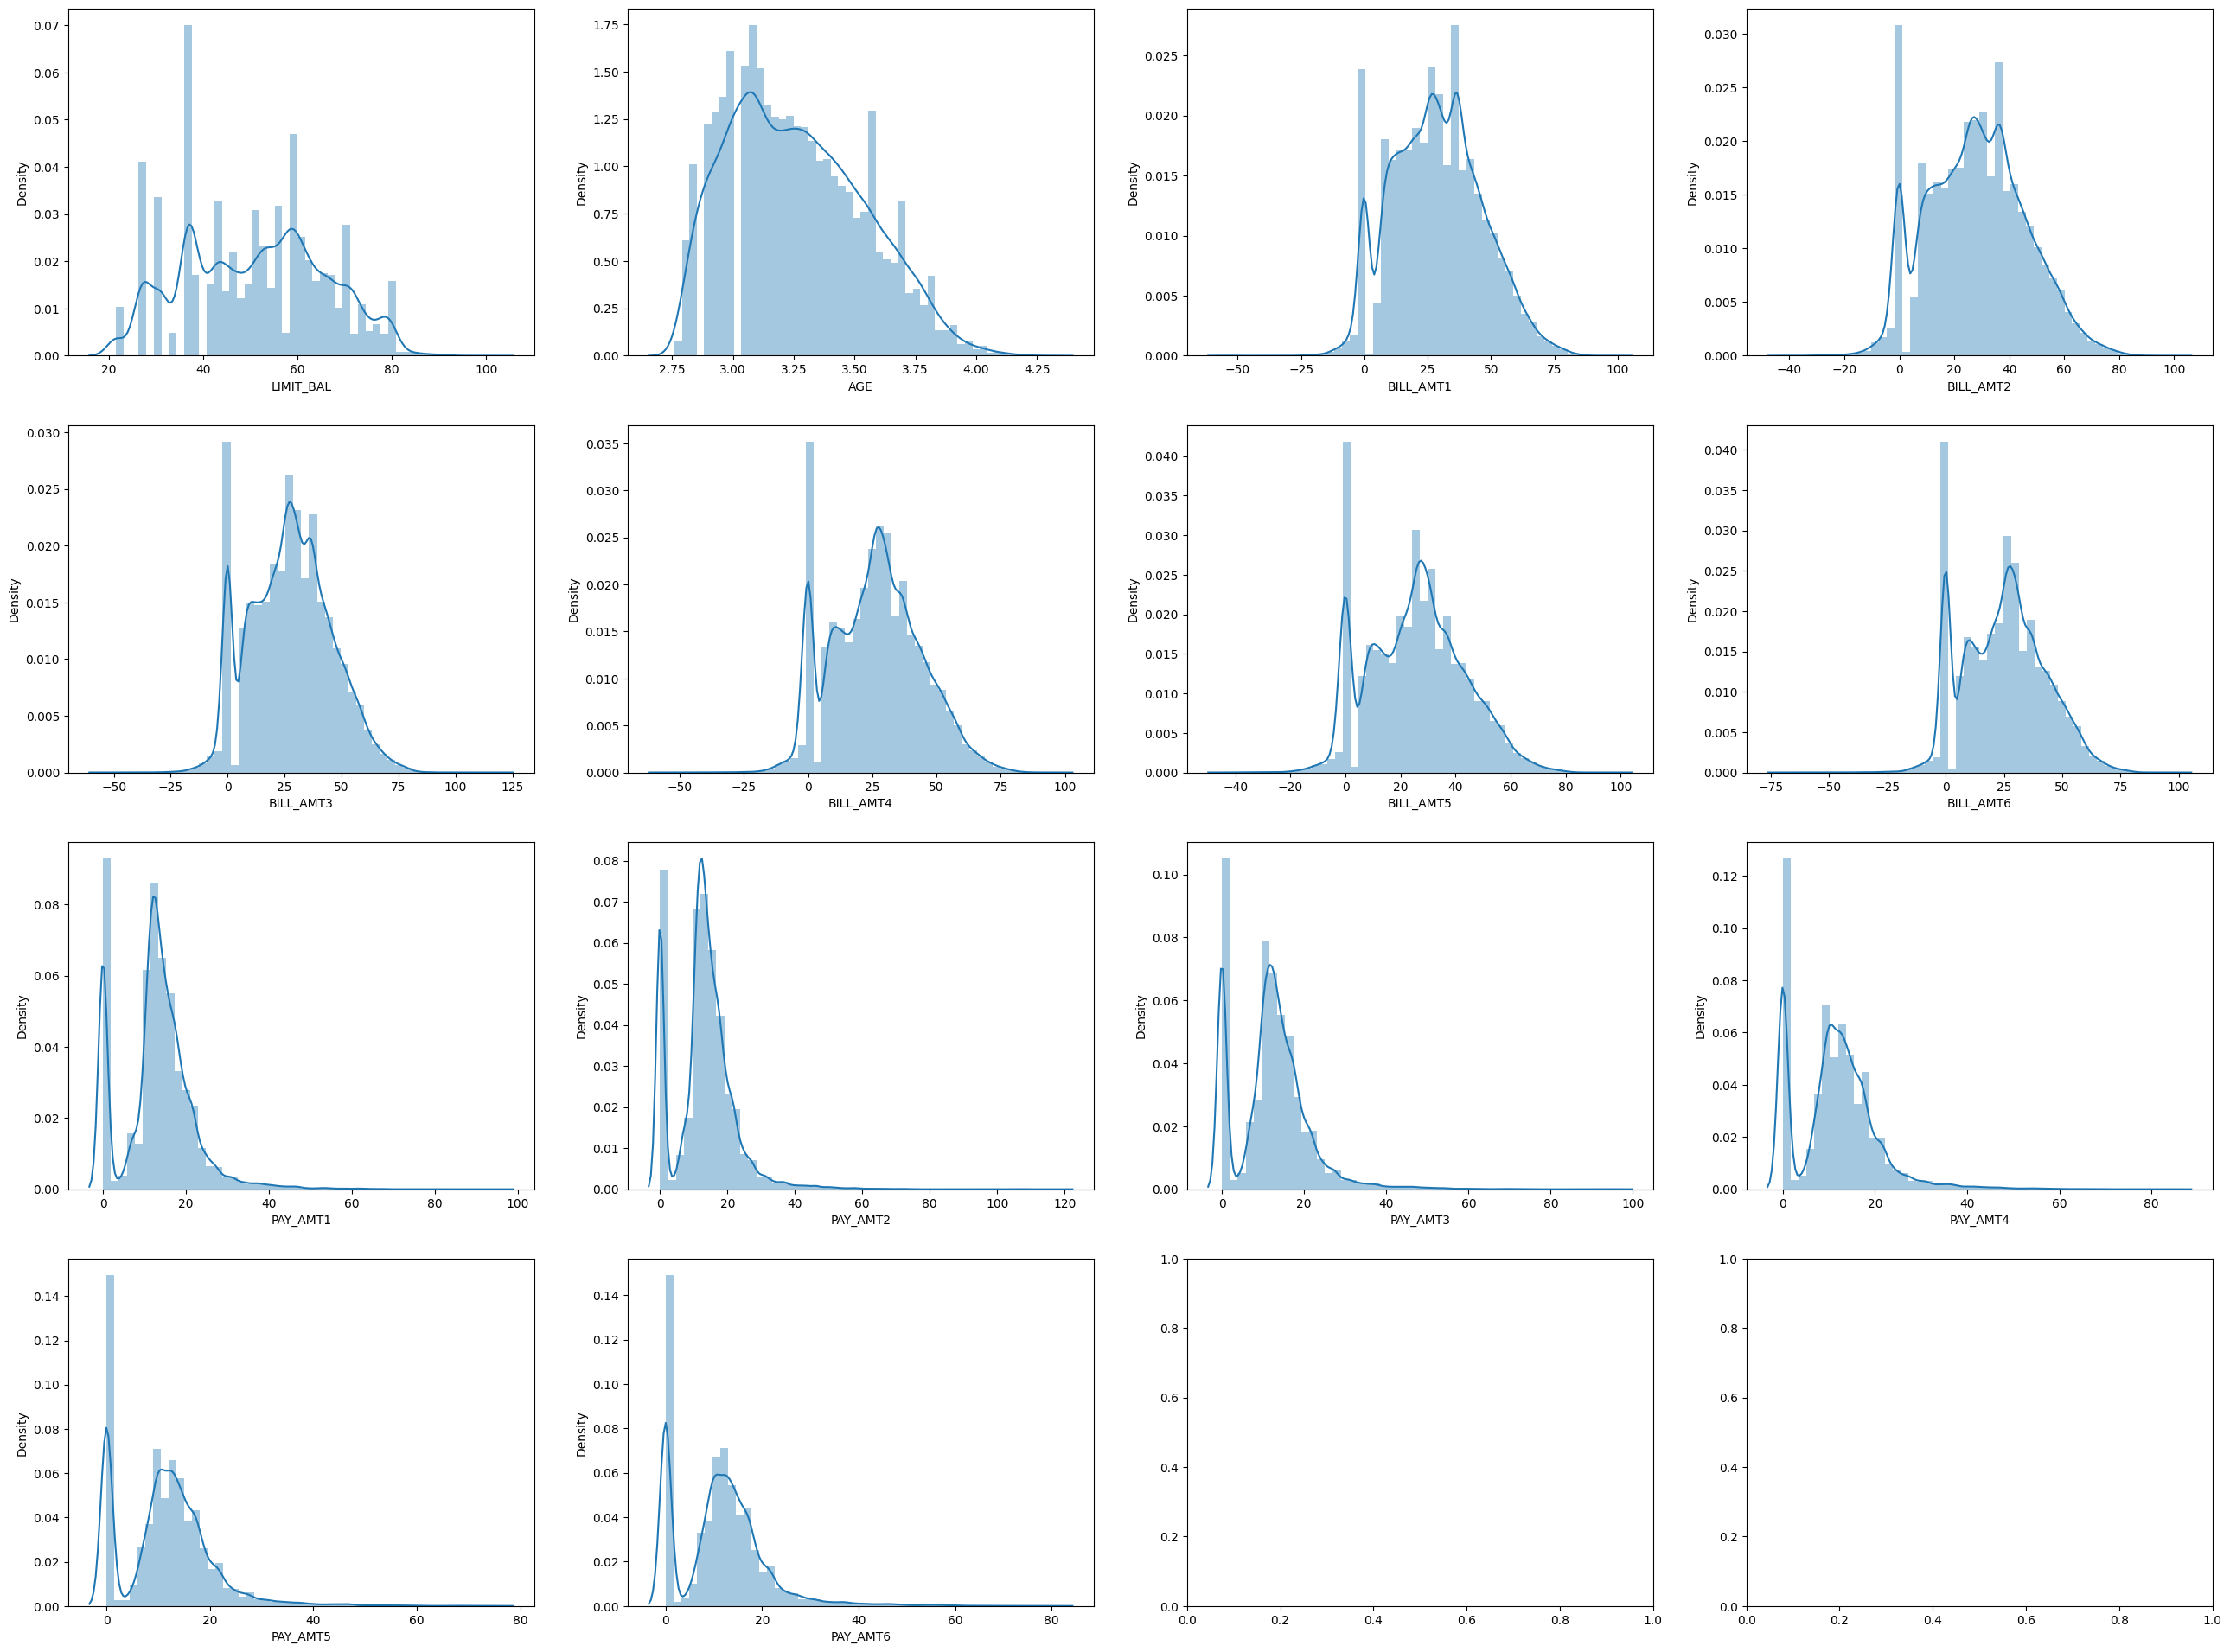

In [ ]:
fig,axs = plt.subplots(4,4,figsize=(32,24))
axs = axs.ravel()
i = 0
for col in trans_num_features.columns:
  sns.distplot(trans_num_features[col],ax=axs[i])
  i=i+1


In [ ]:
# Selecting categorical features with chi2 test.
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(categorical_features)
bestfeatures = SelectKBest(score_func= chi2 ,k='all')
bestfeatures.fit_transform(x_scaled,y)

feature_score = pd.DataFrame(bestfeatures.scores_)
feature_pscore = pd.DataFrame(np.round(bestfeatures.pvalues_,4))
features = pd.DataFrame(categorical_features.columns)
features_df = pd.concat([features,feature_score,feature_pscore],axis=1)
features_df.columns = ['Features','Score','p_value']
features_df.sort_values(by='Score',ascending=False)

,Features,Score,p_value
4,PAY_0,201.517549,0.0000
5,PAY_2,160.027300,0.0000
6,PAY_3,129.692706,0.0000
7,PAY_4,108.131709,0.0000
8,PAY_5,92.598810,0.0000
9,PAY_6,81.065996,0.0000
1,SEX,18.983326,0.0000
2,EDUCATION,1.321876,0.2503
3,MARRIAGE,1.040003,0.3078
0,ID,0.973350,0.3238


In [ ]:
# Selecting numerical Features using f-test.
bestfeatures = SelectKBest(score_func=f_classif,k='all')
bestfeatures.fit_transform(trans_num_features,y)

feature_score = pd.DataFrame(bestfeatures.scores_)
feature_pscore = pd.DataFrame(np.round(bestfeatures.pvalues_,4))
features = pd.DataFrame(numrical_features.columns)
features_df = pd.concat([features,feature_score,feature_pscore],axis=1)
features_df.columns = ['Features','Score','p_value']
features_df.sort_values(by='Score',ascending=False)

,Features,Score,p_value
0,LIMIT_BAL,896.153708,0.0000
8,PAY_AMT1,821.686679,0.0000
9,PAY_AMT2,708.076793,0.0000
10,PAY_AMT3,569.326815,0.0000
11,PAY_AMT4,467.507926,0.0000
13,PAY_AMT6,402.067856,0.0000
12,PAY_AMT5,395.015768,0.0000
2,BILL_AMT1,17.432278,0.0000
3,BILL_AMT2,6.521902,0.0107
4,BILL_AMT3,5.181397,0.0228


In [ ]:
# Features to drop:
cate_drop = ['EDUCATION','MARRIAGE','ID']
num_drop = ['BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [ ]:
cate_features = categorical_features.drop(cate_drop,axis=1)
num_features = trans_num_features.drop(num_drop,axis=1)

In [ ]:
features = pd.concat([cate_features,num_features],axis=1)
features

,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,2,-1,-1,-2,-2,27.144176,2.884499,15.758079,14.584132,8.832285,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000
1,2,-1,2,0,0,0,2,49.324241,2.962496,13.893754,11.993052,13.893754,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210
2,2,0,0,0,0,0,0,44.814047,3.239612,30.807338,24.116906,23.845653,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759
3,2,0,0,0,0,0,0,36.840315,3.332222,36.085701,36.401121,36.665353,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000
4,1,-1,0,-1,0,0,0,36.840315,3.848501,20.501487,17.831766,32.968749,12.599210,33.226178,21.544347,20.800838,8.832285,8.789347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,60.368107,3.391211,57.382672,57.771495,59.284559,20.408276,27.144176,17.103179,14.497423,17.099759,10.000000
29996,1,-1,-1,-1,-1,0,0,53.132928,3.503398,11.894916,12.227154,15.185836,12.247188,15.220448,20.799297,5.052774,0.000000,0.000000
29997,1,4,3,2,-1,0,0,31.072325,3.332222,15.276359,14.971799,14.023769,0.000000,0.000000,28.020393,16.134286,12.599210,14.580997
29998,1,1,-1,0,0,0,-1,43.088694,3.448217,-11.804709,42.795677,42.414638,44.122934,15.050202,10.561244,12.441863,37.554351,12.173408


In [ ]:
# using VIF for feature selection.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(consider_features):
  X = df[consider_features]
  vif_df = pd.DataFrame()
  vif_df['variable'] = X.columns
  vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif_df)

In [ ]:
cal_vif(features.columns)

,variable,VIF
0,SEX,6.606737
1,PAY_0,1.915873
2,PAY_2,3.209618
3,PAY_3,3.720508
4,PAY_4,4.432067
5,PAY_5,4.963360
6,PAY_6,3.399590
7,LIMIT_BAL,3.851683
8,AGE,7.466498
9,BILL_AMT1,20.742669


<Axes: >

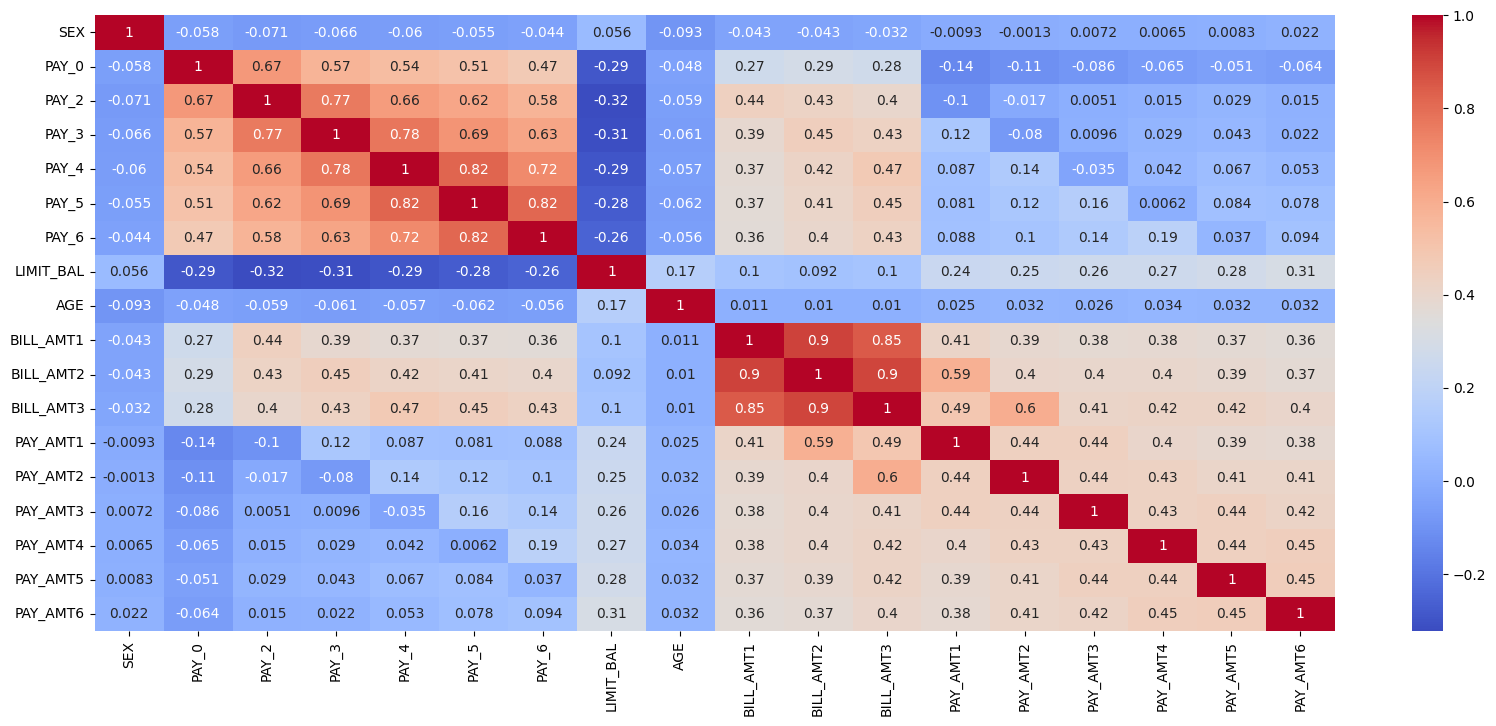

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap((features.corr()),annot=True,cmap='coolwarm')

In [ ]:
#Splitting the Dataset:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.25,random_state=116,stratify=y)
(X_train.shape,X_test.shape)

((22500, 18), (7500, 18))

In [ ]:
# Scaling the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> Model 1: Logistic Regression

In [ ]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN()
X_smote,y_smote = smotenn.fit_resample(X_train,y_train)
X_train = X_smote
y_train = y_smote

In [ ]:
y_train.value_counts()

1    14180
0     9060
Name: default payment next month, dtype: int64

In [ ]:
y_test.value_counts()

0    5841
1    1659
Name: default payment next month, dtype: int64

In [ ]:
# Model fitting :
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.7543889845094665

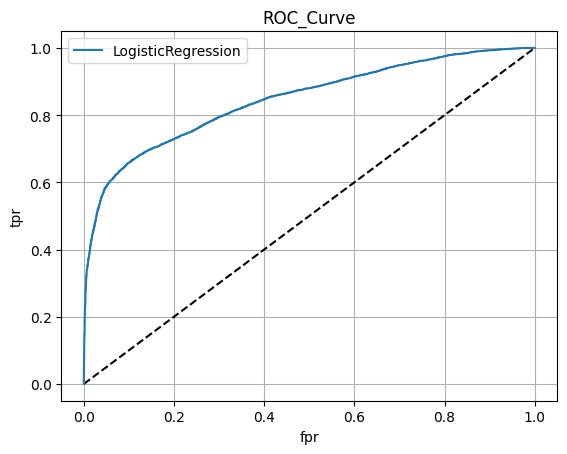

In [ ]:
from sklearn.metrics import roc_curve
y_train_pred_prob = clf.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.title('ROC_Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [ ]:
# Predict model:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Predict Probability:
y_train_prob = clf.predict_proba(X_train)[:,1]
y_test_prob = clf.predict_proba(X_test)[:,1]

In [ ]:
# #confusion_matrics:
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
# from sklearn import metrics
# train_cm = confusion_matrix(y_train,y_train_pred)
# test_cm = confusion_matrix(y_test,y_test_pred)

# # Plotting the confusion matrics:
# fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
# sns.heatmap(train_cm,annot=True,ax=ax1)
# sns.heatmap(test_cm,annot=True,ax=ax2)
# ax1.set_title('Training Dataset')
# ax1.set_xlabel('Predicted')
# ax1.set_ylabel('True_label')
# ax2.set_title('Test Dataset')
# ax2.set_xlabel('Predicted')
# ax2.set_ylabel('True_label')

In [ ]:
# Evaluation Metrics:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn import metrics
def get_evaluation_score(model,X,y):
  y_pred = model.predict(X)
  y_pred_prob = model.predict_proba(X)[:,1]
  #Accuracy_Score:
  train_accuracy = accuracy_score(y,y_pred)
  #roc_auc_score:
  train_auc_score = roc_auc_score(y,y_pred_prob)
  #precision:
  train_precision = metrics.precision_score(y,y_pred)
  #Recall:
  train_recall = metrics.recall_score(y,y_pred)
  #F-score:
  train_fscore = metrics.f1_score(y,y_pred)

  return {'Auc_score' : train_auc_score ,'Accuracy' : train_accuracy ,'Precision' : train_precision ,'Recall':train_recall ,'f1_score':train_fscore}

In [ ]:
eval_metricsdf = pd.DataFrame({'metrics':['Auc_score','Accuracy','Precision','Recall','f1_score']}).set_index('metrics')

In [ ]:
eval_metricsdf['LogisticRegression_Train'] = get_evaluation_score(clf,X_train,y_train)
eval_metricsdf['LogisticRegression_Test'] = get_evaluation_score(clf,X_test,y_test)

In [ ]:
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test
metrics,,
Auc_score,0.845644,0.736817
Accuracy,0.754389,0.570400
Precision,0.784448,0.312635
Recall,0.823836,0.786016
f1_score,0.803660,0.447341


In [ ]:
print(confusion_matrix(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train)))

[[ 5850  3210]
 [ 2498 11682]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      9060
           1       0.78      0.82      0.80     14180

    accuracy                           0.75     23240
   macro avg       0.74      0.73      0.74     23240
weighted avg       0.75      0.75      0.75     23240



In [ ]:
print(confusion_matrix(y_test,clf.predict(X_test)))
print(classification_report(y_test,clf.predict(X_test)))

[[2974 2867]
 [ 355 1304]]
              precision    recall  f1-score   support

           0       0.89      0.51      0.65      5841
           1       0.31      0.79      0.45      1659

    accuracy                           0.57      7500
   macro avg       0.60      0.65      0.55      7500
weighted avg       0.76      0.57      0.60      7500



In [ ]:
# CrossValidation and Hyperparameter Tuning:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','roc_auc','precision','recall','f1']
clf = LogisticRegression()
score = cross_validate(clf, X_train, y_train,scoring=scoring,cv=5,return_train_score=True,return_estimator=True,verbose=10)

[CV] START .....................................................................
[CV] END  accuracy: (train=0.751, test=0.771) f1: (train=0.802, test=0.818) precision: (train=0.780, test=0.794) recall: (train=0.826, test=0.844) roc_auc: (train=0.842, test=0.862) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.754, test=0.748) f1: (train=0.804, test=0.798) precision: (train=0.783, test=0.781) recall: (train=0.825, test=0.816) roc_auc: (train=0.845, test=0.845) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


[CV] END  accuracy: (train=0.757, test=0.746) f1: (train=0.805, test=0.797) precision: (train=0.787, test=0.779) recall: (train=0.825, test=0.815) roc_auc: (train=0.848, test=0.839) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.756, test=0.746) f1: (train=0.804, test=0.799) precision: (train=0.787, test=0.774) recall: (train=0.822, test=0.825) roc_auc: (train=0.848, test=0.835) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.754, test=0.755) f1: (train=0.803, test=0.802) precision: (train=0.785, test=0.789) recall: (train=0.822, test=0.816) roc_auc: (train=0.846, test=0.845) total time=   0.1s


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.4s


In [ ]:
for s in scoring:
  scor = score['test_'+s].mean()
  print(f'{s} : {scor}')

accuracy : 0.7533132530120483
roc_auc : 0.8450366542436104
precision : 0.7833749302240165
recall : 0.8234132581100141
f1 : 0.8028681384250032


In [ ]:
eval_metricsdf['LogisticRegressionCV_Train'] = [0.753313,0.845036,0.783374,0.823413,0.802868]

In [ ]:
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train
metrics,,,
Auc_score,0.845644,0.736817,0.753313
Accuracy,0.754389,0.570400,0.845036
Precision,0.784448,0.312635,0.783374
Recall,0.823836,0.786016,0.823413
f1_score,0.803660,0.447341,0.802868


<h2> Model 2: RandomForest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rfc = RandomForestClassifier(max_depth= 10,min_samples_leaf= 5,min_samples_split=10,random_state=116)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=116)

In [ ]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8775387263339071

In [ ]:
accuracy_score(y_test,y_test_pred)

0.6858666666666666

In [ ]:
roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.7674742954725791

In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[ 7891  1169]
 [ 1677 12503]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      9060
           1       0.91      0.88      0.90     14180

    accuracy                           0.88     23240
   macro avg       0.87      0.88      0.87     23240
weighted avg       0.88      0.88      0.88     23240



In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[3968 1873]
 [ 483 1176]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      5841
           1       0.39      0.71      0.50      1659

    accuracy                           0.69      7500
   macro avg       0.64      0.69      0.64      7500
weighted avg       0.78      0.69      0.71      7500



Text(956.631313131313, 0.5, 'True_label')

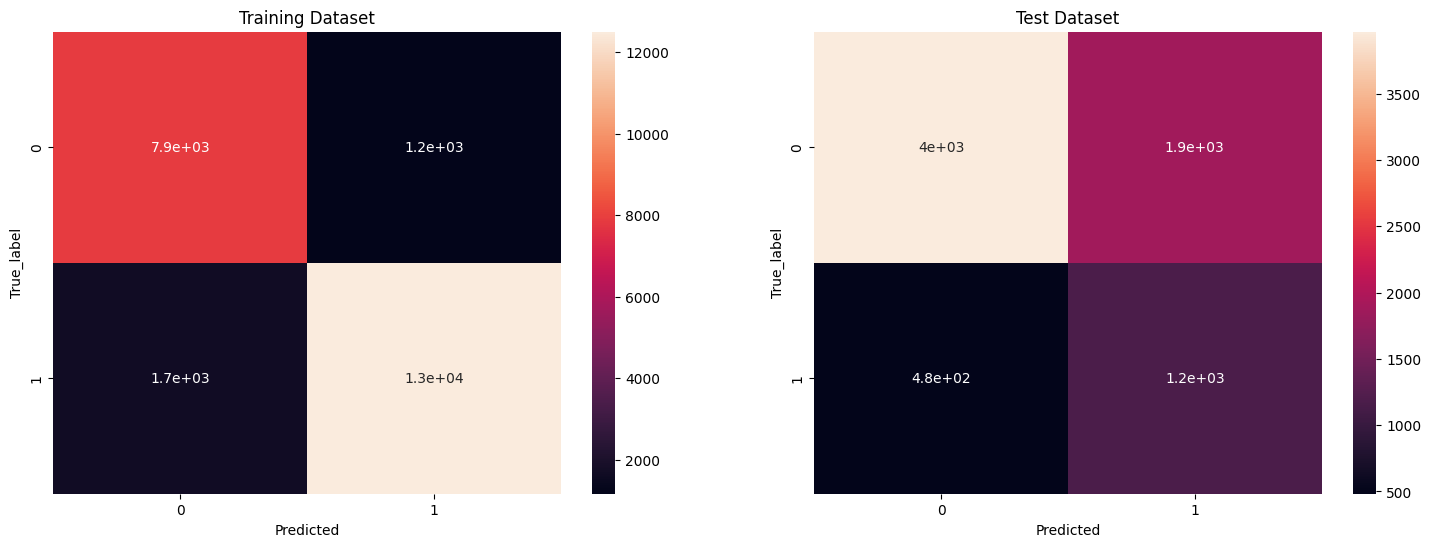

In [ ]:
# Confusion Matrics:
train_cm = confusion_matrix(y_train,y_train_pred)
test_cm = confusion_matrix(y_test,y_test_pred)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sns.heatmap(train_cm,annot=True,ax=ax1)
sns.heatmap(test_cm,annot=True,ax=ax2)
ax1.set_title('Training Dataset')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True_label')
ax2.set_title('Test Dataset')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True_label')

In [ ]:
eval_metricsdf['RandomForest_Train'] = get_evaluation_score(rfc,X_train,y_train)
eval_metricsdf['RandomForest_Test'] = get_evaluation_score(rfc,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test
metrics,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867
Precision,0.784448,0.312635,0.783374,0.914497,0.385700
Recall,0.823836,0.786016,0.823413,0.881735,0.708861
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575


In [ ]:
# cross validation and hyperparameter tuning:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedKFold
rfc = RandomForestClassifier()
cv = RepeatedKFold(n_splits=5,n_repeats=5,random_state=116)
param = {'n_estimators':[100,200,300],
          'max_depth':[5,6,8,10],
          'min_samples_leaf':[4,6,8,10],
          'min_samples_split':[5,8,10,20],
          'max_features':['auto','sqrt','log2']}

rfc_cv = RandomizedSearchCV(estimator=rfc,param_distributions=param,n_iter=10,cv=5,verbose=3)
rfc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=0.838 total time=   9.8s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=0.844 total time=   9.4s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=0.843 total time=   9.8s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=0.847 total time=   9.8s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300;, score=0.854 total time=   8.8s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, score=0.835 total time=  10.2s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=300;, sc

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6, 8, 10],
                                        'min_samples_split': [5, 8, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [ ]:
rfc_cv.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 10}

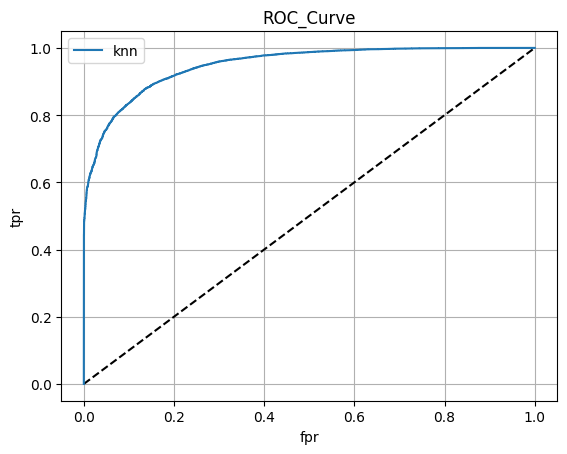

In [ ]:
from sklearn.metrics import roc_curve
y_train_pred_prob = rfc_cv.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.title('ROC_Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [ ]:
roc_auc_score(y_train,rfc_cv.predict_proba(X_train)[:,1])

0.9493449523160126

In [ ]:
roc_auc_score(y_test,rfc_cv.predict_proba(X_test)[:,1])

0.769715421292336

In [ ]:
print(confusion_matrix(y_train,rfc_cv.predict(X_train)))
print(classification_report(y_train,rfc_cv.predict(X_train)))

[[ 7846  1214]
 [ 1762 12418]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      9060
           1       0.91      0.88      0.89     14180

    accuracy                           0.87     23240
   macro avg       0.86      0.87      0.87     23240
weighted avg       0.87      0.87      0.87     23240



In [ ]:
print(confusion_matrix(y_test,rfc_cv.predict(X_test)))
print(classification_report(y_test,rfc_cv.predict(X_test)))

[[3992 1849]
 [ 488 1171]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      5841
           1       0.39      0.71      0.50      1659

    accuracy                           0.69      7500
   macro avg       0.64      0.69      0.64      7500
weighted avg       0.78      0.69      0.71      7500



In [ ]:
eval_metricsdf['RandomForestRSCV_Train'] = get_evaluation_score(rfc_cv,X_train,y_train)
eval_metricsdf['RandomForestRSCV_Test'] = get_evaluation_score(rfc_cv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test
metrics,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedKFold
rfc = RandomForestClassifier()
cv = RepeatedKFold(n_splits=5,n_repeats=5,random_state=116)
params = {'n_estimators':[100,200],
          'max_depth':[3,5,7],
          'min_samples_leaf':[5,10,20],
          'min_samples_split':[8,10,15]}
rfc_gcv = GridSearchCV(estimator=rfc,param_grid=params,cv=3,verbose=3)
rfc_gcv.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.785 total time=   1.3s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.783 total time=   1.0s
[CV 3/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.793 total time=   1.0s
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.784 total time=   2.2s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.787 total time=   2.0s
[CV 3/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.792 total time=   2.0s
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.785 total time=   1.1s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.782 total time=   1.3s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [8, 10, 15],
                         'n_estimators': [100, 200]},
             verbose=3)

In [ ]:
rfc_gcv.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
roc_auc_score(y_train,rfc_gcv.predict_proba(X_train)[:,1])

0.9159714581056552

In [ ]:
roc_auc_score(y_test,rfc_gcv.predict_proba(X_test)[:,1])

0.7664243708011139

In [ ]:
print(confusion_matrix(y_train,rfc_gcv.predict(X_train)))
print(classification_report(y_train,rfc_gcv.predict(X_train)))

[[ 7533  1527]
 [ 2396 11784]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      9060
           1       0.89      0.83      0.86     14180

    accuracy                           0.83     23240
   macro avg       0.82      0.83      0.83     23240
weighted avg       0.84      0.83      0.83     23240



In [ ]:
print(confusion_matrix(y_test,rfc_gcv.predict(X_test)))
print(classification_report(y_test,rfc_gcv.predict(X_test)))

[[3909 1932]
 [ 465 1194]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      5841
           1       0.38      0.72      0.50      1659

    accuracy                           0.68      7500
   macro avg       0.64      0.69      0.63      7500
weighted avg       0.78      0.68      0.71      7500



Text(956.631313131313, 0.5, 'True_label')

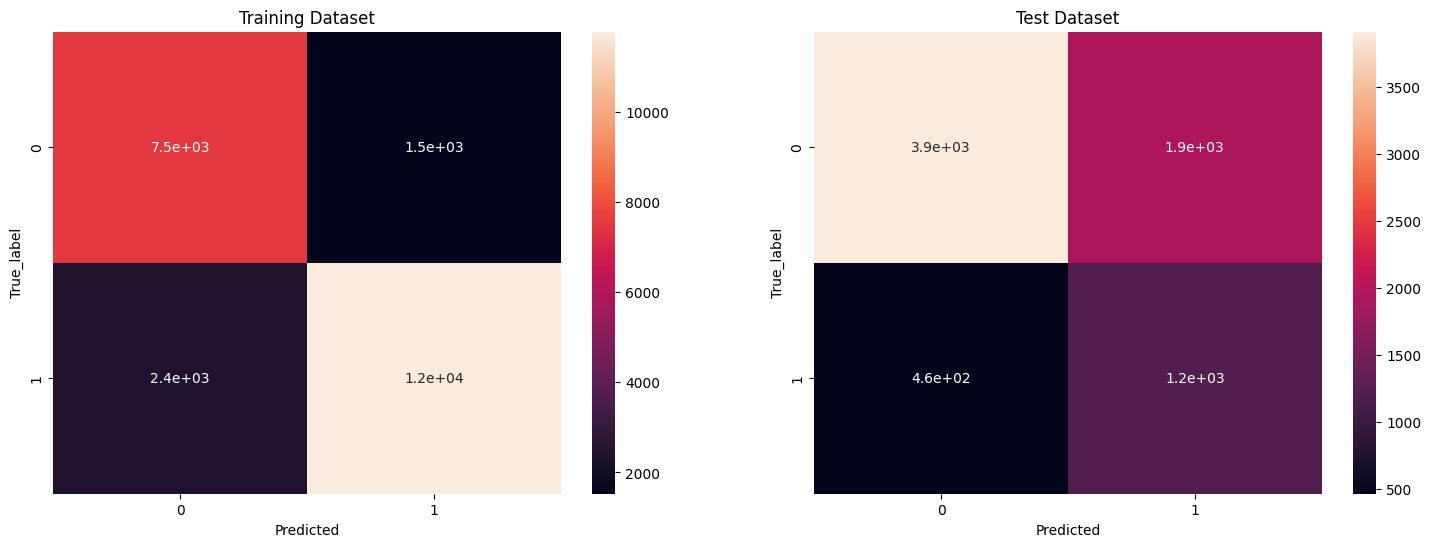

In [ ]:
# Confusion Matrics:
train_cm = confusion_matrix(y_train,rfc_gcv.predict(X_train))
test_cm = confusion_matrix(y_test,rfc_gcv.predict(X_test))

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
sns.heatmap(train_cm,annot=True,ax=ax1)
sns.heatmap(test_cm,annot=True,ax=ax2)
ax1.set_title('Training Dataset')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True_label')
ax2.set_title('Test Dataset')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True_label')

In [ ]:
eval_metricsdf['RandomForestGSCV_Train'] = get_evaluation_score(rfc_gcv,X_train,y_train)
eval_metricsdf['RandomForestGSCV_Test'] = get_evaluation_score(rfc_gcv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test
metrics,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060


<h2> Model 3: K-nearest Neighbouring (kNN)

In [ ]:
#lets deal with imbalanced data first by using SMOTE.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = X_train,y_train

In [ ]:
y_train.value_counts()

1    14180
0     9060
Name: default payment next month, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# set the neighbors:
neighbor = np.arange(1,21)

# set the empty array to record train and test accuracy:
train_accuracy = np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

# Now lets run the algorithm:
for i,k in enumerate(neighbor):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_smote,y_smote)
  #record the score:
  train_accuracy[i] = roc_auc_score(y_smote,knn.predict_proba(X_smote)[:,1])
  test_accuracy[i] = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

In [ ]:
train_accuracy

array([1.        , 0.9999624 , 0.99980994, 0.99944102, 0.99862017,
       0.99716698, 0.99519444, 0.9928803 , 0.99042501, 0.98772309,
       0.98506043, 0.98247074, 0.97989065, 0.97738545, 0.97488525,
       0.97250091, 0.97013839, 0.96776858, 0.96561868, 0.96341845])

In [ ]:
test_accuracy

array([0.65059319, 0.6727237 , 0.68342764, 0.69319888, 0.70000466,
       0.70650018, 0.7112784 , 0.71536665, 0.71758992, 0.72026525,
       0.72245813, 0.72496628, 0.72651237, 0.7283532 , 0.73030754,
       0.73264386, 0.73448696, 0.73595039, 0.73722575, 0.73821345])

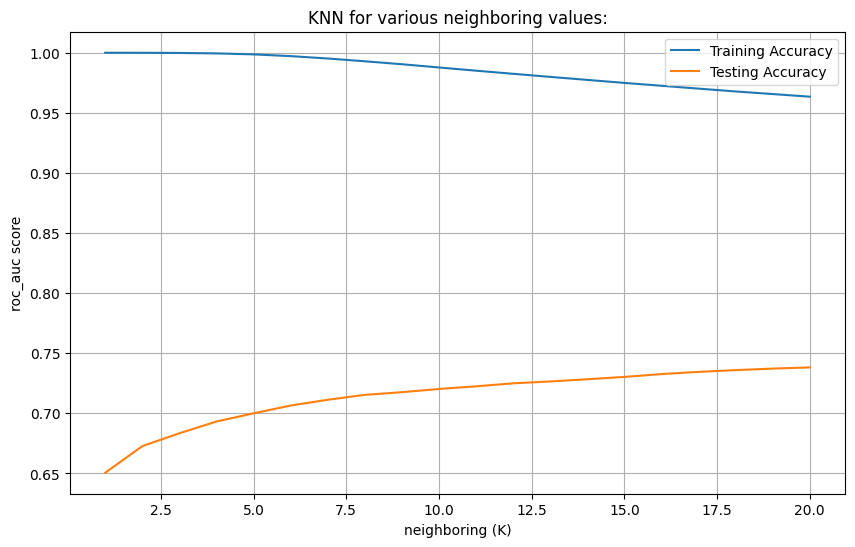

In [ ]:
from sqlalchemy import label
plt.figure(figsize=(10,6))
plt.plot(neighbor,train_accuracy,label='Training Accuracy')
plt.plot(neighbor,test_accuracy,label='Testing Accuracy')
plt.title('KNN for various neighboring values:')
plt.xlabel('neighboring (K)')
plt.ylabel('roc_auc score')
plt.legend()
plt.grid()

In [ ]:
# from the plot we find that score is converging.
# lets take k = 20
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
print(confusion_matrix(y_smote,knn20.predict(X_smote)))
print(classification_report(y_smote,knn20.predict(X_smote)))

[[ 7260  1800]
 [  863 13317]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      9060
           1       0.88      0.94      0.91     14180

    accuracy                           0.89     23240
   macro avg       0.89      0.87      0.88     23240
weighted avg       0.89      0.89      0.88     23240



In [ ]:
print(confusion_matrix(y_test,knn20.predict(X_test)))
print(classification_report(y_test,knn20.predict(X_test)))

[[3216 2625]
 [ 386 1273]]
              precision    recall  f1-score   support

           0       0.89      0.55      0.68      5841
           1       0.33      0.77      0.46      1659

    accuracy                           0.60      7500
   macro avg       0.61      0.66      0.57      7500
weighted avg       0.77      0.60      0.63      7500



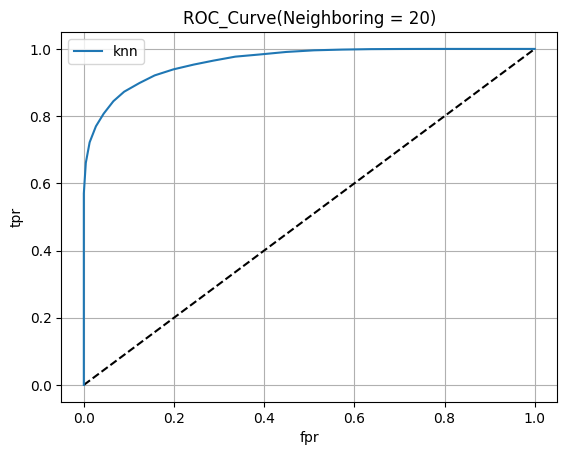

In [ ]:
#Lets see roc_auc curve for test data:
from sklearn.metrics import roc_curve
y_train_pred_prob = knn20.predict_proba(X_smote)[:,1]
fpr,tpr,threshold = roc_curve(y_smote,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.title('ROC_Curve(Neighboring = 20)')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [ ]:
eval_metricsdf['KNN20_Train'] = get_evaluation_score(knn20,X_train,y_train)
eval_metricsdf['KNN20_Test'] = get_evaluation_score(knn20,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test
metrics,,,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424,0.963418,0.738213
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400,0.885413,0.598533
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958,0.880929,0.326578
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711,0.939140,0.767330
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060,0.909103,0.458161


In [ ]:
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedKFold
#Cross-validation and Hyperparameter tuning for kNN Model:
knn = KNeighborsClassifier()
params = {'n_neighbors': [i for i in range(5,25)]}
cv = RepeatedKFold(n_splits= 5,n_repeats=5)
knn_cv = GridSearchCV(estimator=knn,param_grid=params,cv=cv,verbose=3)
knn_cv.fit(X_train,y_train)

Fitting 25 folds for each of 20 candidates, totalling 500 fits
[CV 1/25] END ....................n_neighbors=5;, score=0.927 total time=   1.4s
[CV 2/25] END ....................n_neighbors=5;, score=0.926 total time=   1.6s
[CV 3/25] END ....................n_neighbors=5;, score=0.930 total time=   1.7s
[CV 4/25] END ....................n_neighbors=5;, score=0.924 total time=   1.6s
[CV 5/25] END ....................n_neighbors=5;, score=0.926 total time=   1.0s
[CV 6/25] END ....................n_neighbors=5;, score=0.934 total time=   1.5s
[CV 7/25] END ....................n_neighbors=5;, score=0.923 total time=   1.0s
[CV 8/25] END ....................n_neighbors=5;, score=0.927 total time=   1.1s
[CV 9/25] END ....................n_neighbors=5;, score=0.927 total time=   1.0s
[CV 10/25] END ...................n_neighbors=5;, score=0.924 total time=   0.9s
[CV 11/25] END ...................n_neighbors=5;, score=0.923 total time=   0.6s
[CV 12/25] END ...................n_neighbors=

GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24]},
             verbose=3)

In [ ]:
knn_cv.best_params_

{'n_neighbors': 5}

In [ ]:
roc_auc_score(y_train,knn_cv.predict_proba(X_train)[:,1])

0.9986201728330484

In [ ]:
roc_auc_score(y_test,knn_cv.predict_proba(X_test)[:,1])

0.7000046644972626

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.56      0.69      5841
           1       0.32      0.74      0.45      1659

    accuracy                           0.60      7500
   macro avg       0.60      0.65      0.57      7500
weighted avg       0.76      0.60      0.63      7500



In [ ]:
confusion_matrix(y_train,knn_cv.predict(X_train))

array([[ 8479,   581],
       [   70, 14110]])

<h2> Navie Bayes Classification Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict model:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

#Predict Probability:
y_train_prob = gnb.predict_proba(X_train)[:,1]
y_test_prob = gnb.predict_proba(X_test)[:,1]

In [ ]:
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[ 7285  1775]
 [ 3875 10305]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      9060
           1       0.85      0.73      0.78     14180

    accuracy                           0.76     23240
   macro avg       0.75      0.77      0.75     23240
weighted avg       0.77      0.76      0.76     23240



In [ ]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[3935 1906]
 [ 505 1154]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77      5841
           1       0.38      0.70      0.49      1659

    accuracy                           0.68      7500
   macro avg       0.63      0.68      0.63      7500
weighted avg       0.77      0.68      0.70      7500



In [ ]:
eval_metricsdf['GaussianNB_Train'] = get_evaluation_score(gnb,X_train,y_train)
eval_metricsdf['GaussianNB_Test'] = get_evaluation_score(gnb,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test
metrics,,,,,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424,0.963418,0.738213,0.846047,0.741137
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400,0.885413,0.598533,0.756885,0.678533
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958,0.880929,0.326578,0.853063,0.377124
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711,0.939140,0.767330,0.726728,0.695600
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060,0.909103,0.458161,0.784844,0.489087


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=116)
param = {'learning_rate':[0.0001,0.001,0.01,0.1],
         'min_samples_leaf':[5,10,20,40],
         'max_depth':[3,5,7,9]}
gbc_cv = RandomizedSearchCV(gbc,param_distributions=param,verbose=3)
gbc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=20;, score=0.792 total time=   6.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=20;, score=0.784 total time=   7.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=20;, score=0.785 total time=   6.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=20;, score=0.787 total time=   7.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=20;, score=0.793 total time=   6.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=5;, score=0.806 total time=  11.5s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=5;, score=0.809 total time=  11.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=5;, score=0.805 total time=  10.8s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=5;, score=0.812 total time=  13.7s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_sa

RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=116),
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [5, 10, 20, 40]},
                   verbose=3)

In [ ]:
gbc_cv.best_params_

{'min_samples_leaf': 20, 'max_depth': 9, 'learning_rate': 0.01}

In [ ]:
roc_auc_score(y_train,gbc_cv.predict_proba(X_train)[:,1])

0.9552678118296141

In [ ]:
roc_auc_score(y_test,gbc_cv.predict_proba(X_test)[:,1])

0.7600779198075915

In [ ]:
print(confusion_matrix(y_train,gbc_cv.predict(X_train)))
print(classification_report(y_train,gbc_cv.predict(X_train)))

[[ 7285  1775]
 [  916 13264]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      9060
           1       0.88      0.94      0.91     14180

    accuracy                           0.88     23240
   macro avg       0.89      0.87      0.88     23240
weighted avg       0.88      0.88      0.88     23240



In [ ]:
print(confusion_matrix(y_test,gbc_cv.predict(X_test)))
print(classification_report(y_test,gbc_cv.predict(X_test)))

[[3510 2331]
 [ 416 1243]]
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      5841
           1       0.35      0.75      0.48      1659

    accuracy                           0.63      7500
   macro avg       0.62      0.68      0.60      7500
weighted avg       0.77      0.63      0.66      7500



In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=5,max_depth=7,random_state=116)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, min_samples_leaf=5,
                           random_state=116)

In [ ]:
roc_auc_score(y_train,gbc.predict_proba(X_train)[:,1])

0.937362719777568

In [ ]:
roc_auc_score(y_test,gbc.predict_proba(X_test)[:,1])

0.7576034143294388

In [ ]:
print(confusion_matrix(y_train,gbc.predict(X_train)))
print(classification_report(y_train,gbc.predict(X_train)))

[[ 6924  2136]
 [ 1243 12937]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      9060
           1       0.86      0.91      0.88     14180

    accuracy                           0.85     23240
   macro avg       0.85      0.84      0.84     23240
weighted avg       0.85      0.85      0.85     23240



In [ ]:
print(confusion_matrix(y_test,gbc.predict(X_test)))
print(classification_report(y_test,gbc.predict(X_test)))

[[3341 2500]
 [ 373 1286]]
              precision    recall  f1-score   support

           0       0.90      0.57      0.70      5841
           1       0.34      0.78      0.47      1659

    accuracy                           0.62      7500
   macro avg       0.62      0.67      0.59      7500
weighted avg       0.78      0.62      0.65      7500



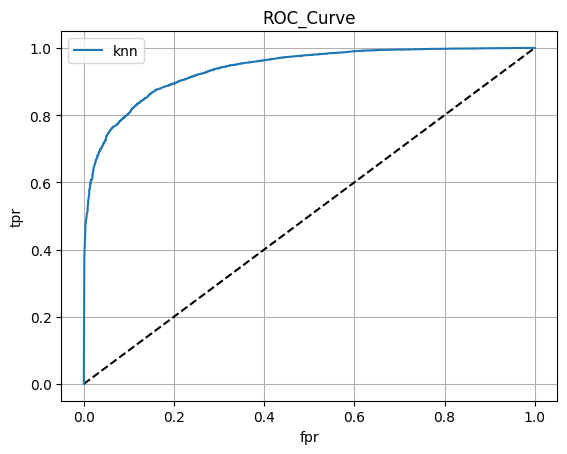

In [ ]:
from sklearn.metrics import roc_curve
y_test_pred_prob = gbc.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_test_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.title('ROC_Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [ ]:
eval_metricsdf['GradientBoost_Train'] = get_evaluation_score(gbc,X_train,y_train)
eval_metricsdf['GradientBoost_Test'] = get_evaluation_score(gbc,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test,GradientBoost_Train,GradientBoost_Test
metrics,,,,,,,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424,0.963418,0.738213,0.846047,0.741137,0.937363,0.757603
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400,0.885413,0.598533,0.756885,0.678533,0.854604,0.616933
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958,0.880929,0.326578,0.853063,0.377124,0.858290,0.339672
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711,0.939140,0.767330,0.726728,0.695600,0.912341,0.775166
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060,0.909103,0.458161,0.784844,0.489087,0.884490,0.472360


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth = 6,min_samples_leaf=5,min_samples_split=15)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15)

In [ ]:
print(confusion_matrix(y_train,dc.predict(X_train)))
print(classification_report(y_train,dc.predict(X_train)))

[[ 6952  2108]
 [ 2331 11849]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9060
           1       0.85      0.84      0.84     14180

    accuracy                           0.81     23240
   macro avg       0.80      0.80      0.80     23240
weighted avg       0.81      0.81      0.81     23240



In [ ]:
print(confusion_matrix(y_test,dc.predict(X_test)))
print(classification_report(y_test,dc.predict(X_test)))

[[3600 2241]
 [ 480 1179]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      5841
           1       0.34      0.71      0.46      1659

    accuracy                           0.64      7500
   macro avg       0.61      0.66      0.59      7500
weighted avg       0.76      0.64      0.67      7500



In [ ]:
dc = DecisionTreeClassifier()
param = {'min_samples_leaf':[5,10,20,40],
         'max_depth':[3,5,7,9]}
dc_gcv = GridSearchCV(estimator=dc,param_grid=param,verbose=2,cv=5)
dc_gcv.fit(X_train,y_train)

In [ ]:
dc_gcv.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

In [ ]:
print(confusion_matrix(y_train,dc_gcv.predict(X_train)))
print(classification_report(y_train,dc_gcv.predict(X_train)))

[[ 7024  2036]
 [ 1358 12822]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      9060
           1       0.86      0.90      0.88     14180

    accuracy                           0.85     23240
   macro avg       0.85      0.84      0.84     23240
weighted avg       0.85      0.85      0.85     23240



In [ ]:
print(confusion_matrix(y_test,dc_gcv.predict(X_test)))
print(classification_report(y_test,dc_gcv.predict(X_test)))

[[3490 2351]
 [ 431 1228]]
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      5841
           1       0.34      0.74      0.47      1659

    accuracy                           0.63      7500
   macro avg       0.62      0.67      0.59      7500
weighted avg       0.77      0.63      0.66      7500



In [ ]:
eval_metricsdf['DecisionTree_Train'] = get_evaluation_score(dc,X_train,y_train)
eval_metricsdf['DecisionTree_Test'] = get_evaluation_score(dc,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test,GradientBoost_Train,GradientBoost_Test,DecisionTree_Train,DecisionTree_Test
metrics,,,,,,,,,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424,0.963418,0.738213,0.846047,0.741137,0.937363,0.757603,0.890927,0.736535
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400,0.885413,0.598533,0.756885,0.678533,0.854604,0.616933,0.808993,0.637200
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958,0.880929,0.326578,0.853063,0.377124,0.858290,0.339672,0.848965,0.344737
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711,0.939140,0.767330,0.726728,0.695600,0.912341,0.775166,0.835614,0.710669
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060,0.909103,0.458161,0.784844,0.489087,0.884490,0.472360,0.842236,0.464265


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
print(confusion_matrix(y_train,adaboost.predict(X_train)))
print(classification_report(y_train,adaboost.predict(X_train)))

[[ 7149  1911]
 [ 2337 11843]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      9060
           1       0.86      0.84      0.85     14180

    accuracy                           0.82     23240
   macro avg       0.81      0.81      0.81     23240
weighted avg       0.82      0.82      0.82     23240



In [ ]:
print(confusion_matrix(y_test,adaboost.predict(X_test)))
print(classification_report(y_test,adaboost.predict(X_test)))

[[3828 2013]
 [ 468 1191]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      5841
           1       0.37      0.72      0.49      1659

    accuracy                           0.67      7500
   macro avg       0.63      0.69      0.62      7500
weighted avg       0.78      0.67      0.70      7500



In [ ]:
param = {'n_estimators':[50,100,150,200,300],
         'learning_rate':[0.001,0.01,0.1,1]}
ada_gcv = GridSearchCV(estimator=adaboost,param_grid=param,verbose=2,cv=3)
ada_gcv.fit(X_train,y_train)

In [ ]:
ada_gcv.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [ ]:
print(confusion_matrix(y_train,ada_gcv.predict(X_train)))
print(classification_report(y_train,ada_gcv.predict(X_train)))

[[ 7671  1389]
 [ 1876 12304]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      9060
           1       0.90      0.87      0.88     14180

    accuracy                           0.86     23240
   macro avg       0.85      0.86      0.85     23240
weighted avg       0.86      0.86      0.86     23240



In [ ]:
print(confusion_matrix(y_test,ada_gcv.predict(X_test)))
print(classification_report(y_test,ada_gcv.predict(X_test)))

[[4138 1703]
 [ 523 1136]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      5841
           1       0.40      0.68      0.51      1659

    accuracy                           0.70      7500
   macro avg       0.64      0.70      0.65      7500
weighted avg       0.78      0.70      0.73      7500



In [ ]:
eval_metricsdf['Adaboost_Train'] = get_evaluation_score(ada_gcv,X_train,y_train)
eval_metricsdf['Adaboost_Test'] = get_evaluation_score(ada_gcv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test,GradientBoost_Train,GradientBoost_Test,DecisionTree_Train,DecisionTree_Test,Adaboost_Train,Adaboost_Test
metrics,,,,,,,,,,,,,,,,,,,
Auc_score,0.845644,0.736817,0.753313,0.952325,0.767474,0.949345,0.769715,0.915971,0.766424,0.963418,0.738213,0.846047,0.741137,0.937363,0.757603,0.890927,0.736535,0.937953,0.759500
Accuracy,0.754389,0.570400,0.845036,0.877539,0.685867,0.871945,0.688400,0.831196,0.680400,0.885413,0.598533,0.756885,0.678533,0.854604,0.616933,0.808993,0.637200,0.859509,0.703200
Precision,0.784448,0.312635,0.783374,0.914497,0.385700,0.910945,0.387748,0.885283,0.381958,0.880929,0.326578,0.853063,0.377124,0.858290,0.339672,0.848965,0.344737,0.898561,0.400141
Recall,0.823836,0.786016,0.823413,0.881735,0.708861,0.875740,0.705847,0.831030,0.719711,0.939140,0.767330,0.726728,0.695600,0.912341,0.775166,0.835614,0.710669,0.867701,0.684750
f1_score,0.803660,0.447341,0.802868,0.897817,0.499575,0.892996,0.500534,0.857299,0.499060,0.909103,0.458161,0.784844,0.489087,0.884490,0.472360,0.842236,0.464265,0.882862,0.505113


In [ ]:
from sklearn.svm import SVC
svm = SVC(class_weight={0:1,1:1.565},kernel='rbf')
svm.fit(X_train,y_train)

SVC(class_weight={0: 1, 1: 1.565})

In [ ]:
print(confusion_matrix(y_train,svm.predict(X_train)))
print(classification_report(y_train,svm.predict(X_train)))

[[ 6118  2942]
 [  841 13339]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      9060
           1       0.82      0.94      0.88     14180

    accuracy                           0.84     23240
   macro avg       0.85      0.81      0.82     23240
weighted avg       0.84      0.84      0.83     23240



In [ ]:
print(confusion_matrix(y_test,svm.predict(X_test)))
print(classification_report(y_test,svm.predict(X_test)))

[[2793 3048]
 [ 285 1374]]
              precision    recall  f1-score   support

           0       0.91      0.48      0.63      5841
           1       0.31      0.83      0.45      1659

    accuracy                           0.56      7500
   macro avg       0.61      0.65      0.54      7500
weighted avg       0.78      0.56      0.59      7500



In [ ]:
eval_metricsdf['SVM_Train'] = get_evaluation_score(svm,X_train,y_train)
eval_metricsdf['SVM_Test'] = get_evaluation_score(svm,X_test,y_test)
eval_metricsdf